In [47]:
# 必要なモジュールのインポート
import boto3  # AWSのサービスを利用するときに必須
import json  # json形式のデータを処理する
from PIL import Image, ImageDraw  # pillow の Image モジュール 画像処理に使用する

In [48]:
file_in_1 = 'nishino1.jpg'
file_in_2 = 'nishino2.jpg'
file_out = 'compared.jpg'  # 見つかった顔の部分だけを出力する画像ファイル名

In [49]:
# Rekognition サービスクライアントを作成
rekognition = boto3.client('rekognition')

# ソース画像(元になる顔)をオープン
with open(file_in_1, 'rb') as source:
    # ターゲット画像(この画像から該当の顔を探す)をオープン
    with open(file_in_2, 'rb') as target:
        # ソース画像の顔をターゲット画像から探す
        result = rekognition.compare_faces(
                    SourceImage={'Bytes': source.read()},  # 元になる顔
                    TargetImage={'Bytes': target.read()})  # ここから顔を探す

# 検出結果のjsonを整形して表示
print(json.dumps(result, indent=4))

{
    "SourceImageFace": {
        "BoundingBox": {
            "Width": 0.2983545958995819,
            "Height": 0.2548961937427521,
            "Left": 0.34339141845703125,
            "Top": 0.12927645444869995
        },
        "Confidence": 99.96611022949219
    },
    "FaceMatches": [
        {
            "Similarity": 97.54694366455078,
            "Face": {
                "BoundingBox": {
                    "Width": 0.32293447852134705,
                    "Height": 0.26112180948257446,
                    "Left": 0.16921518743038177,
                    "Top": 0.22415512800216675
                },
                "Confidence": 99.9999771118164,
                "Landmarks": [
                    {
                        "Type": "eyeLeft",
                        "X": 0.22207359969615936,
                        "Y": 0.3393056094646454
                    },
                    {
                        "Type": "eyeRight",
                        "X": 0.3393736481666565,


In [50]:
# キー 'FaceMatches' の内容を取得
face_matches = result.get('FaceMatches', [])
print("Face Matches:", json.dumps(face_matches, indent=4))

Face Matches: [
    {
        "Similarity": 97.54694366455078,
        "Face": {
            "BoundingBox": {
                "Width": 0.32293447852134705,
                "Height": 0.26112180948257446,
                "Left": 0.16921518743038177,
                "Top": 0.22415512800216675
            },
            "Confidence": 99.9999771118164,
            "Landmarks": [
                {
                    "Type": "eyeLeft",
                    "X": 0.22207359969615936,
                    "Y": 0.3393056094646454
                },
                {
                    "Type": "eyeRight",
                    "X": 0.3393736481666565,
                    "Y": 0.32197105884552
                },
                {
                    "Type": "mouthLeft",
                    "X": 0.272187203168869,
                    "Y": 0.4349766671657562
                },
                {
                    "Type": "mouthRight",
                    "X": 0.3704252243041992,
                    "Y

In [51]:
# 該当した顔の数を表示
print("Number of matched faces:", len(face_matches))

Number of matched faces: 1


In [52]:
# 1つ目の顔の BoundingBox の内容を取得
box = face_matches[0]['Face']['BoundingBox']
print("BoundingBox:", json.dumps(box, indent=4))

BoundingBox: {
    "Width": 0.32293447852134705,
    "Height": 0.26112180948257446,
    "Left": 0.16921518743038177,
    "Top": 0.22415512800216675
}


In [53]:
# 1つ目の顔の信頼度を取得
confidence = face_matches[0]['Face']['Confidence']
print("Confidence:", confidence)

Confidence: 99.9999771118164


In [54]:
# ターゲット画像(この画像から該当の顔を探す)をオープン
image_in = Image.open(file_in_2)
# 画像のサイズを取得
w, h = image_in.size

# 画像オブジェクトに対する描画オブジェクトの生成
image_out = image_in.copy()
draw = ImageDraw.Draw(image_out)

# 検出された顔の分だけ繰り返す
for face in result["FaceMatches"]:  # 見つかったものはFaceMatchesに含まれる
    # その中のキーFaceに情報が入っている
    # バウンディングボックスBoundingBoxを取得
    box = face["Face"]["BoundingBox"]

    # 顔の左、上、右、下の座標を取得
    left = int(box['Left']*w)
    top = int(box['Top']*h)
    right = left+int(box['Width']*w)
    bottom = top+int(box['Height']*h)

    # マッチした顔部分を赤色枠の長方形で囲み
    draw.rectangle([left, top, right, bottom], outline="red", width=5)

print(f"Left = {left}, Top = {top}, Right = {right}, Bottom = {bottom}")

Left = 203, Top = 403, Right = 590, Bottom = 873


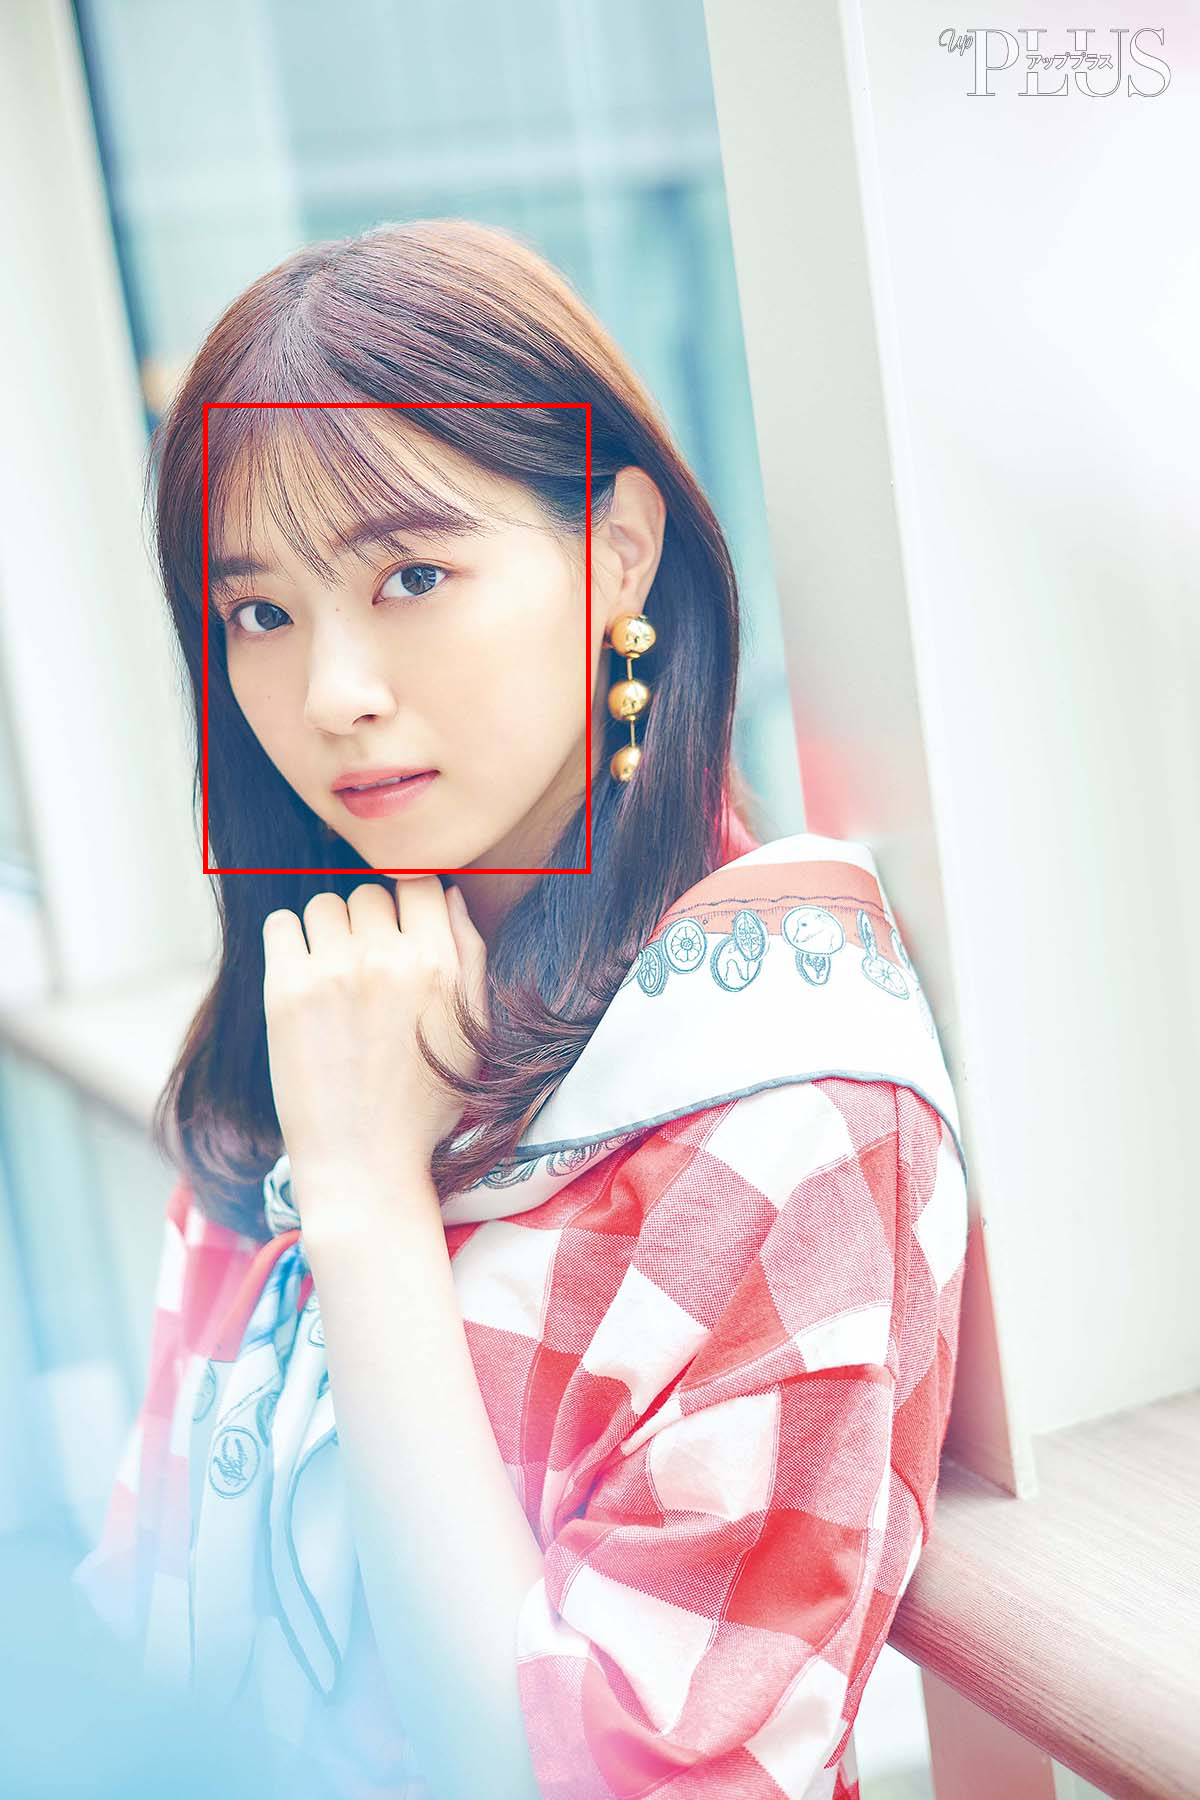

In [55]:
# 画像をファイルに保存
image_out.save(file_out)

# 画像を表示
image_out.show()